Implement decision trees considering a data set of your choice. Create an ID3 Decision Tree. Implement the ID3 algorithm on your own. Use a pre-defined sklearn library for both Entropy-Information Gain as well as Gini Index calculation. Compare the results you got between your hand-coded algorithm and sklearn. Draw the decision tree. Write the interference on the choice of the root node, the internal nodes and the leaf nodes. Also calculate the Decision Tree model measurement metrics such as confusion matrix, accuracy, precision, recall, sensitivity, specificity, MCC etc.Write the inference. 


In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../datasets/tennis.csv")
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [4]:
df['Outlook']=df['Outlook'].map({'Sunny':2,'Rain':1,'Overcast':0})

In [5]:
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,Hot,High,Weak,No
1,2,Hot,High,Strong,No
2,0,Hot,High,Weak,Yes
3,1,Mild,High,Weak,Yes
4,1,Cool,Normal,Weak,Yes
5,1,Cool,Normal,Strong,No
6,0,Cool,Normal,Strong,Yes
7,2,Mild,High,Weak,No
8,2,Cool,Normal,Weak,Yes
9,1,Mild,Normal,Weak,Yes


In [6]:
df['Temperature'] = df['Temperature'].map({'Hot':2,'Mild':1,'Cool':0})

In [7]:
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,2,High,Weak,No
1,2,2,High,Strong,No
2,0,2,High,Weak,Yes
3,1,1,High,Weak,Yes
4,1,0,Normal,Weak,Yes
5,1,0,Normal,Strong,No
6,0,0,Normal,Strong,Yes
7,2,1,High,Weak,No
8,2,0,Normal,Weak,Yes
9,1,1,Normal,Weak,Yes


In [8]:
df['Humidity'] = df['Humidity'].map({'High':1,'Normal':0})
df['Wind'] = df['Wind'].map({'Weak':0,'Strong':1})
df['Play Tennis']=df['Play Tennis'].map({'Yes':1,'No':0})

In [9]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,2,1,0,0
1,2,2,1,1,0
2,0,2,1,0,1
3,1,1,1,0,1
4,1,0,0,0,1


In [10]:
y = df['Play Tennis']
x = df.drop(columns=['Play Tennis'])

In [11]:
x

,Outlook,Temperature,Humidity,Wind
0,2,2,1,0
1,2,2,1,1
2,0,2,1,0
3,1,1,1,0
4,1,0,0,0
5,1,0,0,1
6,0,0,0,1
7,2,1,1,0
8,2,0,0,0
9,1,1,0,0


In [12]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play Tennis, dtype: int64

In [13]:
from sklearn import tree 
from sklearn.model_selection import train_test_split

In [14]:
model = tree.DecisionTreeClassifier(criterion='gini')
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=True,test_size=0.2)

In [15]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [16]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1])

[Text(0.4, 0.9, 'x[0] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.2, 0.7, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.7, 'x[2] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.4, 0.5, 'x[3] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.3, 'x[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

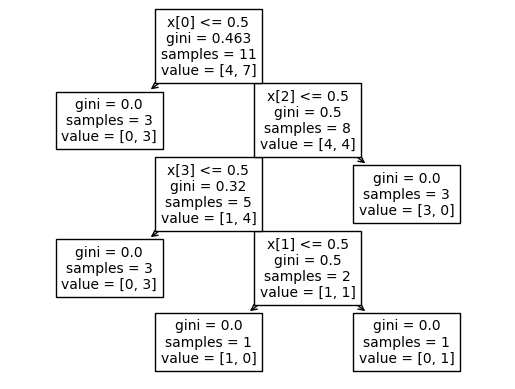

In [17]:
tree.plot_tree(model)

In [18]:
from sklearn import metrics

In [19]:
acc = metrics.accuracy_score(y_test,y_pred)

In [20]:
acc

0.6666666666666666

In [21]:
prec = metrics.precision_score(y_test,y_pred)

In [22]:
prec

1.0

In [23]:
cm=metrics.confusion_matrix(y_test,y_pred)
cm

array([[1, 0],
       [1, 1]])

<Axes: >

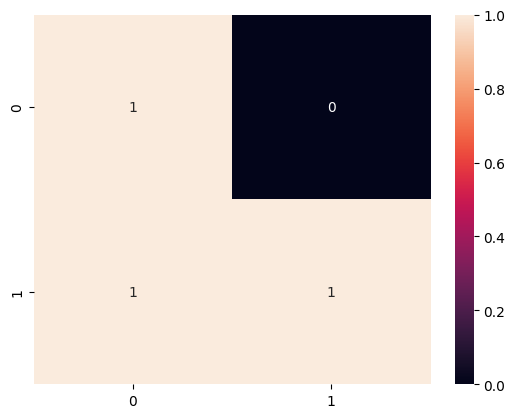

In [24]:
sb.heatmap(cm,annot=True,fmt='g')

In [25]:
#MCC, RECALL,sensitivity,specificity
mcc = metrics.matthews_corrcoef(y_test,y_pred)

In [26]:
mcc

0.5

In [27]:
recall = metrics.recall_score(y_test,y_pred)

In [28]:
sensitivity = metrics.s

AttributeError: module 'sklearn.metrics' has no attribute 'sensitivity_score'